#  Лабораторная работа по методам оптимизации.<a class=tocSkip></a>
## Поиск минимума в невыпуклой задачи математического программирования.<a 

**2018 год**

В данной работе требуется провести поиск точек локальных минимумов целевой функции с заданными ограничениями. Проверить выполнимость условий Каруша-Куна-Такера для найденных точек.


Целевая функция: 

$f = 3(x_1^2 + x_2)^2 + (x_1^2 - 1)^2$

Функции ограничения: 

$g_1 = 0.5x_1 + x_2 + 0.5$

$g_2 = -10(x_1 + 1)^2 - (x_2 - 2)^2 + 12$

$g_3 = x_2 + 0.8$

Задача математического программирования является невыпуклой, следовательно условия Каруша-Куна-Такера носят необходимый характер, которые должны выполняться для точки локального минимума.

## Подключение библиотек и настройка параметров

In [39]:
# Подключение объектов из библиотек numpy и matplotlib для более удобной
# дальнейшей интерактивной работы
from pylab import *

# Подключение объектов из вспомогательного модуля control_theory
from control_theory import *
# Настройка размеров и разрешения рисунков (960x720 по умолчанию, можно
# изменить для комфортной работы на мониторах с малым разрешением)
rcParams['figure.figsize'] = (9.6, 7.2) # Размер рисунков по умолчанию
rcParams['figure.dpi'] = 100 # Разрешение рисунков по умолчанию


from sympy import *
from sympy.plotting import plot3d

import numpy as np
import matplotlib.pylab as plt
import scipy.optimize as opt
import sympy as sp

lambda1 = sp.symbols('lambda1')
lambda2 = sp.symbols('lambda2')
lambda3 = sp.symbols('lambda3')

## Инициализация заданных функций

In [40]:
# Инициализация заданных функций
x1, x2 = symbols('x1 x2')
f = 3 * (x1**2 + x2)**2 + (x1**2 - 1)**2
g1 = 0.5 * x1 + x2 + 0.5
g2 = -10 * (x1 + 1)**2 - (x2 - 2)**2 + 12
g3 = x2 + 0.8

## Построение графика целевой функции

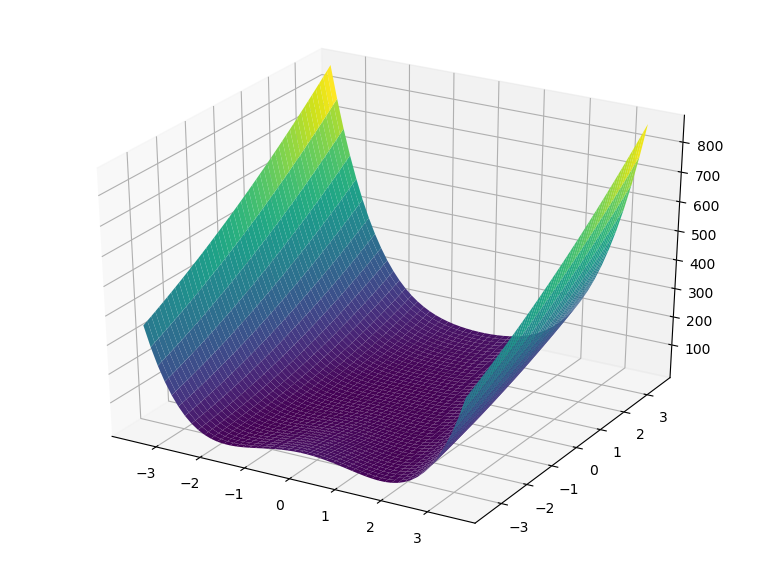

In [41]:
# Отрисовка графика функции
leftBoundary = -3.5
rightBoundary = 3.5
plot3d(f, (x1, leftBoundary, rightBoundary), (x2, leftBoundary, rightBoundary))

# Для notebook
def gradient(scalarFunction, variables):
    matrixScalarFunction = Matrix([scalarFunction])
    return matrixScalarFunction.jacobian(variables)
#print(latex(gradient(f, [x1, x2])))

## Создание вспомогательных методов

### Целевая функция и ограничения

In [42]:
# --------------------------------------------------- ВАРИАНТ 3 --------------------------------------------------------
def f(x):
    return 3 * (x[0]**2 + x[1])**2 + (x[0]**2 - 1)**2


def g1(x):
    return 0.5 * x[0] + x[1] + 0.5


def g2(x):
    return -10 * (x[0] + 1)**2 - (x[1] - 2)**2 + 12


def g3(x):
    return x[1] + 0.8
# ----------------------------------------------------------------------------------------------------------------------

### Функция отображения допустимого множества и линий уровня

In [43]:

def initPlot(plotName, x1, x2):
    plt.figure(plotName)
    # Окрашивание допустимого множества D (желтый цвет)
    plt.pcolormesh(x1, x2, (g1([x1, x2]) <= 0) & (g2([x1, x2]) <= 0) & (g3([x1, x2]) <= 0), alpha=0.1)

    # Линии уровня целевой функции (последний аргумент - количество линий)
    contours = plt.contour(x1, x2, f([x1, x2]), 30)

    # Значение уровня на линиях (последний аргумент - размер шрифта)
    plt.clabel(contours, inline=True, fontsize=8)

    # Ограничения(предпоследний аргумент - активность ограничения, т.е. g1(x) = 0)
    plt.contour(x1, x2, g1([x1, x2]), (0,), colors='g')
    plt.contour(x1, x2, g2([x1, x2]), (0,), colors='r')
    plt.contour(x1, x2, g3([x1, x2]), (0,), colors='y')
    title(plotName)
    return plt


### Функция поиска минимума с отображением результата

In [44]:
def findMin(f, initialGuess, cons):
    result = opt.minimize(f, initialGuess, constraints=cons)

    print("--->Начальное приближение: ", initialGuess)
    print("--->f* = ", result.fun)
    print("--->x* = ", result.x)

    return result

### Функция проверки условий ККТ

In [45]:
def KKT(L):
    x = sp.symbols('x1 x2')

    dL_dx1 = sp.diff(L, x[0])
    dL_dx2 = sp.diff(L, x[1])
    dL_dlambda1 = sp.diff(L, lambda1)
    dL_dlambda2 = sp.diff(L, lambda2)
    dL_dlambda3 = sp.diff(L, lambda3)

    print("--->L = ", L)
    print("--->dL_dx1: ", dL_dx1)
    print("--->dL_dx2: ", dL_dx2)
    print("--->dL_dlambda1 = ", dL_dlambda1)
    print("--->dL_dlambda2 = ", dL_dlambda2)
    print("--->dL_dlambda3 = ", dL_dlambda3)

    return sp.solve([dL_dx1, dL_dx2, dL_dlambda1, dL_dlambda2, dL_dlambda3], dict=True)

## Поиск минимума функции

### Отображение допустимого множества

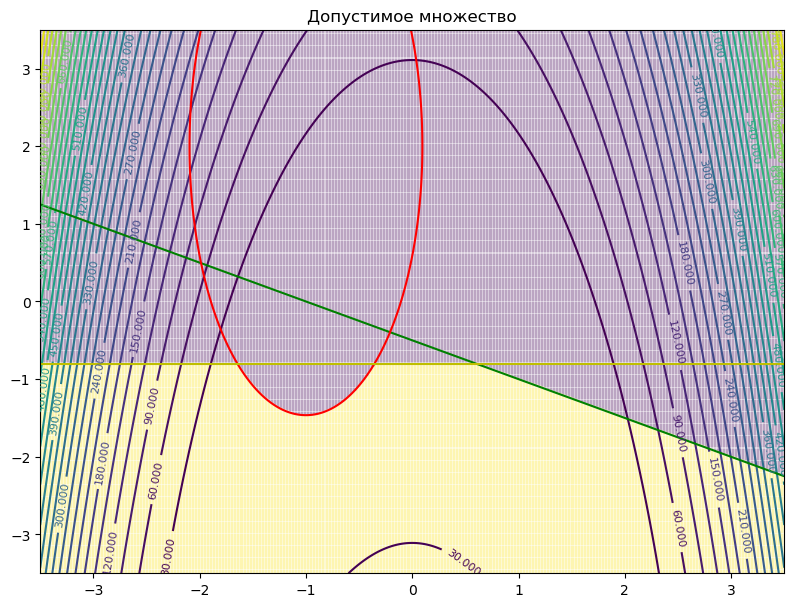

In [46]:
if __name__ == "__main__":
    leftBoundary = -3.5
    rightBoundary = 3.5
    density = 500
    x1, x2 = np.meshgrid(np.linspace(leftBoundary, rightBoundary, density),
                         np.linspace(leftBoundary, rightBoundary, density))
    x = sp.symbols('x1 x2')

    plotName = "Допустимое множество"    
    initPlot(plotName, x1, x2).show(plotName)

На графике жёлтой зоной обозначено допустимое множество.

Линиям уровня целевой функции соответствуют кривые чёрного цвета.

Ограничению $g_1$ соответствует прямая зелёного цвета.

Ограничению $g_2$ соответствует кривая красного цвета.

Ограничению $g_3$ соответствует прямая жёлтого цвета.

### Поиск и проверка решения при активных ограничениях $g_2$ и $g_3$

#### Начальное приближение  $(0.0, -2.5)$

Поиск минимума:
--->Начальное приближение:  [0.0, -2.5]
--->f* =  2.126479506512771
--->x* =  [-0.35501938 -0.8       ]
Проверка условий Каруша-Куна-Таккера
--->L =  lambda2*(-10*(x1 + 1)**2 - (x2 - 2)**2 + 12) + lambda3*(x2 + 0.8) + (x1**2 - 1)**2 + 3*(x1**2 + x2)**2
--->dL_dx1:  lambda2*(-20*x1 - 20) + 4*x1*(x1**2 - 1) + 12*x1*(x1**2 + x2)
--->dL_dx2:  lambda2*(-2*x2 + 4) + lambda3 + 6*x1**2 + 6*x2
--->dL_dlambda1 =  0
--->dL_dlambda2 =  -10*(x1 + 1)**2 - (x2 - 2)**2 + 12
--->dL_dlambda3 =  x2 + 0.8
--->Решение системы:  {lambda2: 0.318794410442866, lambda3: 2.25851873988656, x1: -0.355019380136116, x2: -0.800000000000000}


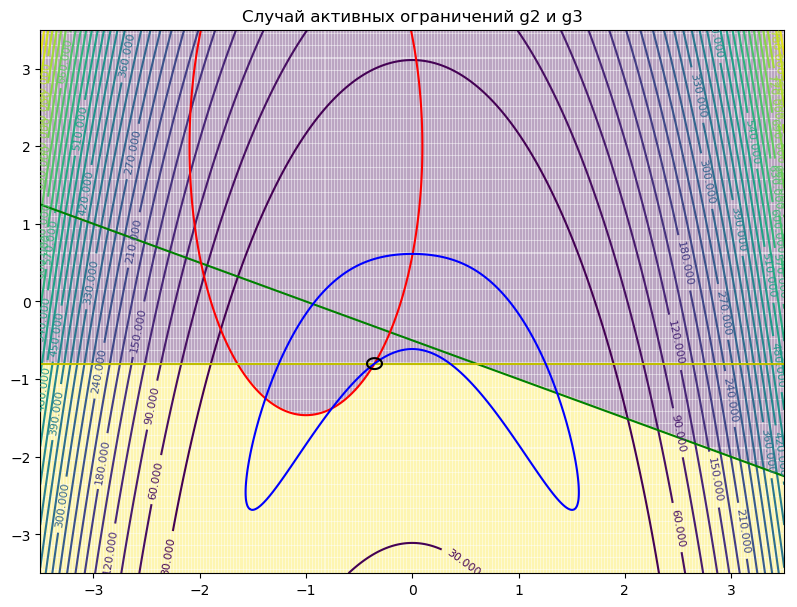

In [52]:
if __name__ == "__main__":
    # НАЧАЛЬНЫЕ УСЛОВИЯ #
    startApproximation = [0.0, -2.5]
    print("Поиск минимума:");
    opt2 = findMin(f, startApproximation, ({'type': 'eq', 'fun': g2}, {'type': 'eq', 'fun': g3}))

    print("Проверка условий Каруша-Куна-Таккера");
    kkt = KKT(f(x) + lambda2 * g2(x) + lambda3 * g3(x))
    print("--->Решение системы: ", kkt[0])

    plotName = "Cлучай активных ограничений g2 и g3"
    plot2 = initPlot(plotName, x1, x2)

    # Рисование линии уровня, соответствующей найденному min (предпоследний аргумент - значение уровня)
    plot2.contour(x1, x2, f([x1, x2]), (opt2.fun,), colors='b')
    plot2.contour(x1, x2, (x1 - opt2.x[0]) ** 2 + (x2 - opt2.x[1]) ** 2, (0.005,), colors='black')  # Точка min
    plot2.show(plotName)

Найденная точка минимума обведена чёрным овалом. Соответствующая этой точки линия уровня имеет синий цвет.

Численный метод нашёл точку $x^* = (-0.35501938;-0.8)$ ,соответствующее значение функции в ней $f^* =  2.126479506512771$.

Проверка условий Каруша-Куна-Таккера дало положительный результат. Множители функции Лагранжа $\lambda_2 = 0.318794410442866$ и $\lambda_3 = 2.25851873988656$ являются положительными. Выполнимость ККТ позволяет считать найденную точку локальным минимумом.

#### Начальное приближение  $(-3.0, -2.5)$

Поиск минимума:
--->Начальное приближение:  [-3.0, -2.5]
--->f* =  13.808368666695642
--->x* =  [-1.64498062 -0.8       ]
Проверка условий Каруша-Куна-Таккера
--->L =  lambda2*(-10*(x1 + 1)**2 - (x2 - 2)**2 + 12) + lambda3*(x2 + 0.8) + (x1**2 - 1)**2 + 3*(x1**2 + x2)**2
--->dL_dx1:  lambda2*(-20*x1 - 20) + 4*x1*(x1**2 - 1) + 12*x1*(x1**2 + x2)
--->dL_dx2:  lambda2*(-2*x2 + 4) + lambda3 + 6*x1**2 + 6*x2
--->dL_dlambda1 =  0
--->dL_dlambda2 =  -10*(x1 + 1)**2 - (x2 - 2)**2 + 12
--->dL_dlambda3 =  x2 + 0.8
--->Решение системы:  {lambda2: 0.318794410442866, lambda3: 2.25851873988656, x1: -0.355019380136116, x2: -0.800000000000000}


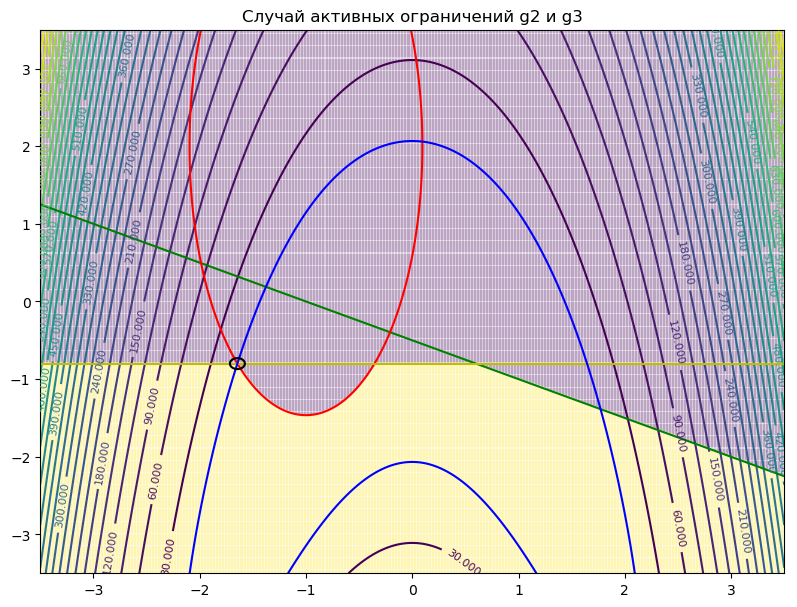

In [51]:
if __name__ == "__main__":
    # НАЧАЛЬНЫЕ УСЛОВИЯ #
    startApproximation = [-3.0, -2.5]
    print("Поиск минимума:");
    opt2 = findMin(f, startApproximation, ({'type': 'eq', 'fun': g2}, {'type': 'eq', 'fun': g3}))

    print("Проверка условий Каруша-Куна-Таккера");
    kkt = KKT(f(x) + lambda2 * g2(x) + lambda3 * g3(x))
    print("--->Решение системы: ", kkt[0])

    plotName = "Cлучай активных ограничений g2 и g3"
    plot2 = initPlot(plotName, x1, x2)

    # Рисование линии уровня, соответствующей найденному min (предпоследний аргумент - значение уровня)
    plot2.contour(x1, x2, f([x1, x2]), (opt2.fun,), colors='b')
    plot2.contour(x1, x2, (x1 - opt2.x[0]) ** 2 + (x2 - opt2.x[1]) ** 2, (0.005,), colors='black')  # Точка min
    plot2.show(plotName)

Найденная точка минимума обведена чёрным овалом. Соответствующая этой точки линия уровня имеет синий цвет.

Численный метод нашёл точку $x^* = (-1.64498062;-0.8)$ ,соответствующее значение функции в ней $f^* =  13.808368666695642$.

Проверка условий Каруша-Куна-Таккера дало положительный результат. Множители функции Лагранжа $\lambda_2 = 0.318794410442866$ и $\lambda_3 = 2.25851873988656$ являются положительными. Выполнимость ККТ позволяет считать найденную точку локальным минимумом.

### Поиск и проверка решения при активных ограничениях $g_1$ и $g_3$ 

#### Начальное приближение $(1.0, -2.5)$

Поиск минимума:
--->Начальное приближение:  [1.0, -2.5]
--->f* =  0.9903999999999991
--->x* =  [ 0.6 -0.8]
Проверка условий Каруша-Куна-Таккера
--->L =  lambda1*(0.5*x1 + x2 + 0.5) + lambda3*(x2 + 0.8) + (x1**2 - 1)**2 + 3*(x1**2 + x2)**2
--->dL_dx1:  0.5*lambda1 + 4*x1*(x1**2 - 1) + 12*x1*(x1**2 + x2)
--->dL_dx2:  lambda1 + lambda3 + 6*x1**2 + 6*x2
--->dL_dlambda1 =  0.5*x1 + x2 + 0.5
--->dL_dlambda2 =  0
--->dL_dlambda3 =  x2 + 0.8
--->Решение системы:  [{lambda1: 9.40800000000000, lambda3: -6.76800000000000, x1: 0.600000000000000, x2: -0.800000000000000}]


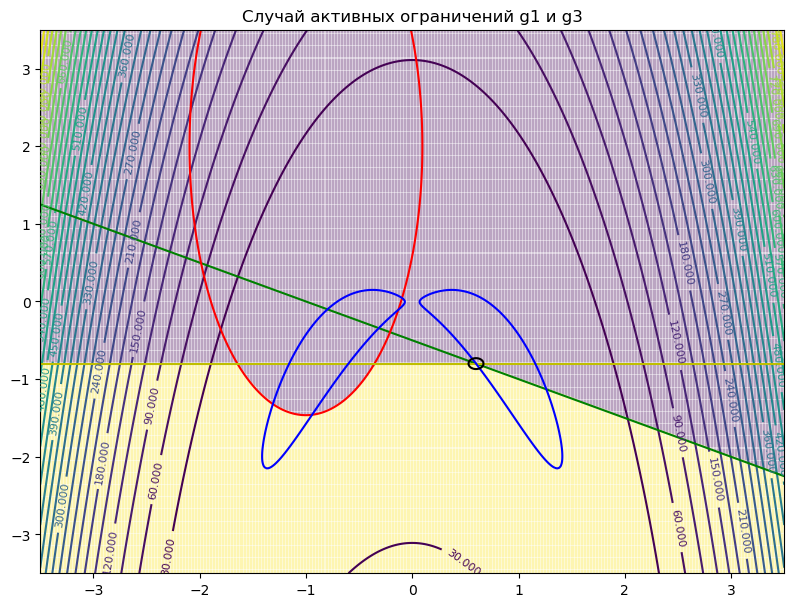

In [65]:
 if __name__ == "__main__":
    # НАЧАЛЬНЫЕ УСЛОВИЯ # 
    startApproximation = [1.0, -2.5]
    print("Поиск минимума:");
    opt1 = findMin(f, startApproximation, ({'type': 'eq', 'fun': g1},{'type': 'eq', 'fun': g3}))

    print("Проверка условий Каруша-Куна-Таккера");
    kkt = KKT(f(x) + lambda1 * g1(x)+ lambda3 * g3(x))
    print("--->Решение системы: ", kkt)

    plotName = "Cлучай активных ограничений g1 и g3"
    plot1 = initPlot(plotName, x1, x2)

    # Рисование линии уровня, соответствующей найденному min (предпоследний аргумент - значение уровня)
    plot1.contour(x1, x2, f([x1, x2]), (opt1.fun,), colors='b')
    plot1.contour(x1, x2, (x1 - opt1.x[0]) ** 2 + (x2 - opt1.x[1]) ** 2, (0.005,), colors='black')  # Точка min
    plot1.show(plotName)

Найденная точка минимума обведена чёрным овалом. Соответствующая этой точки линия уровня имеет синий цвет.

Численный метод нашёл точку $x^* = (0.6 ;-0.8)$ ,соответствующее значение функции в ней $f^* =  0.9903999999999991$.

Проверка условий Каруша-Куна-Таккера дало отрицательный результат. Множитель функции Лагранжа $\lambda_1 = 9.408$ положительный,а $\lambda_3 = -6.7680$ является отрицательным, поэтому найденная точкя не является локальным минимумом.



### Поиск и проверка решения при активном ограничении $g_3$

#### Начальное приближение $(0.0, -2.5)$

Поиск минимума:
--->Начальное приближение:  [0.0, -2.5]
--->f* =  2.9200000000000004
--->x* =  [ 0.  -0.8]
Проверка условий Каруша-Куна-Таккера
--->L =  lambda3*(x2 + 0.8) + (x1**2 - 1)**2 + 3*(x1**2 + x2)**2
--->dL_dx1:  4*x1*(x1**2 - 1) + 12*x1*(x1**2 + x2)
--->dL_dx2:  lambda3 + 6*x1**2 + 6*x2
--->dL_dlambda1 =  0
--->dL_dlambda2 =  0
--->dL_dlambda3 =  x2 + 0.8
--->Решение системы:  [{lambda3: -0.300000000000000, x1: -0.921954445729289, x2: -0.800000000000000}, {lambda3: -0.300000000000000, x1: 0.921954445729289, x2: -0.800000000000000}, {lambda3: 4.80000000000000, x1: 0.0, x2: -0.800000000000000}]


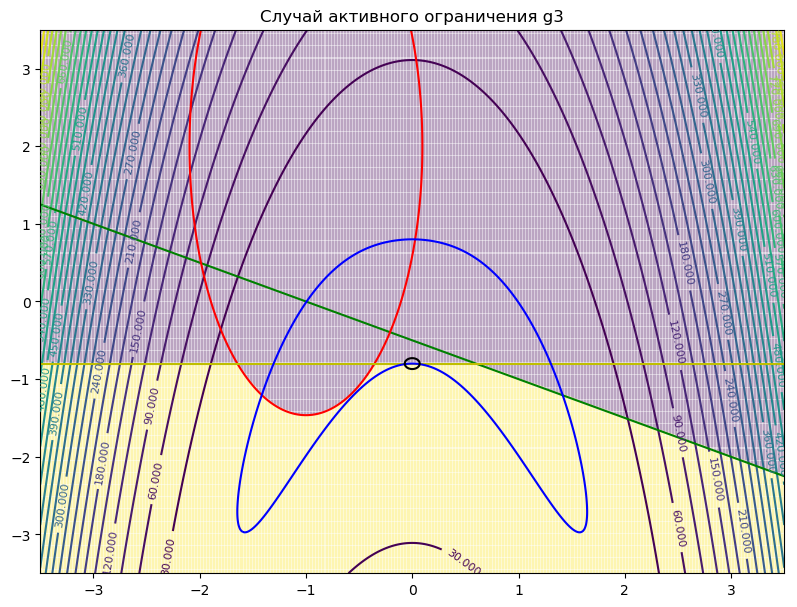

In [86]:
 if __name__ == "__main__":
    # НАЧАЛЬНЫЕ УСЛОВИЯ #1
    startApproximation = [0.0, -2.5]
    print("Поиск минимума:");
    opt1 = findMin(f, startApproximation, {'type': 'eq', 'fun': g3})

    print("Проверка условий Каруша-Куна-Таккера");
    kkt = KKT(f(x) + lambda3 * g3(x))
    print("--->Решение системы: ", kkt)

    plotName = "Cлучай активного ограничения g3"
    plot1 = initPlot(plotName, x1, x2)

    # Рисование линии уровня, соответствующей найденному min (предпоследний аргумент - значение уровня)
    plot1.contour(x1, x2, f([x1, x2]), (opt1.fun,), colors='b')
    plot1.contour(x1, x2, (x1 - opt1.x[0]) ** 2 + (x2 - opt1.x[1]) ** 2, (0.005,), colors='black')  # Точка min
    plot1.show(plotName)

Найденная точка минимума обведена чёрным овалом. Соответствующая этой точки линия уровня имеет синий цвет.

Численный метод нашёл точку $x^* = (0.0 ; -0.8)$ ,соответствующее значение функции в ней $f^* =  2.9200000000000004$.

Проверка условий Каруша-Куна-Таккера дало положительный результат. Множитель функции Лагранжа $\lambda_3 = 4.80000000000000$ является положительными. Выполнимость ККТ позволяет считать найденную точку локальным минимумом.